# Singn_Language_Detection_Main_Code

**Importing Libraries for Sign Language Detection**

This section imports all the necessary libraries required for building, training, and evaluating a sign language detection model. The libraries include:
*   **Numpy and Pandas** for data manipulation and analysis.
*   **Matplotlib and Seaborn** for data visualization.
*   **TensorFlow and Keras** for constructing and training neural network models.
*   **Scikit-learn** for model evaluation metrics.
*   **OpenCV** for image processing tasks.











In [61]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# TensorFlow and Keras for building and training the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

In [63]:
# Sklearn for performance metrics and preprocessing
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelBinarizer

In [64]:
# OpenCV for image processing
import cv2

In [65]:
# Suppress the specific warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='tensorflow.keras.preprocessing.image')

**Exploring and Visualizing Sign Language Dataset**

This code segment loads and explores the sign language dataset, consisting of both training and test data.
*   Loading and Checking Data
*   Checking Duplicates
*   Visualizing Class Distribution






In [66]:
# Loading and Checking Train Data
reference_train_data = pd.read_csv('/content/sign_mnist_train.csv')
print('reference_train_data_shape :', reference_train_data.shape)
print('Null_Values :' ,reference_train_data.isnull().sum().sum()) # To check null values in the data set
reference_train_data.info()
reference_train_data.head()

reference_train_data_shape : (27455, 785)
Null_Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [67]:
# Loading and Checking Test Data
reference_test_data = pd.read_csv('/content/sign_mnist_test.csv')
print('reference_test_data_shape :', reference_test_data.shape)
print('Null_Values :' ,reference_test_data.isnull().sum().sum()) # To check null values in the data set
reference_test_data.info()
reference_test_data.head()

reference_test_data_shape : (7172, 785)
Null_Values : 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [68]:
# Checking Duplicates
print("train_duplicate_values : ", reference_train_data.duplicated().sum()) # To check duplicate values in the train data set
print("test_duplicate_values : ", reference_test_data.duplicated().sum()) # To check duplicate values in the test data set

train_duplicate_values :  0
test_duplicate_values :  0


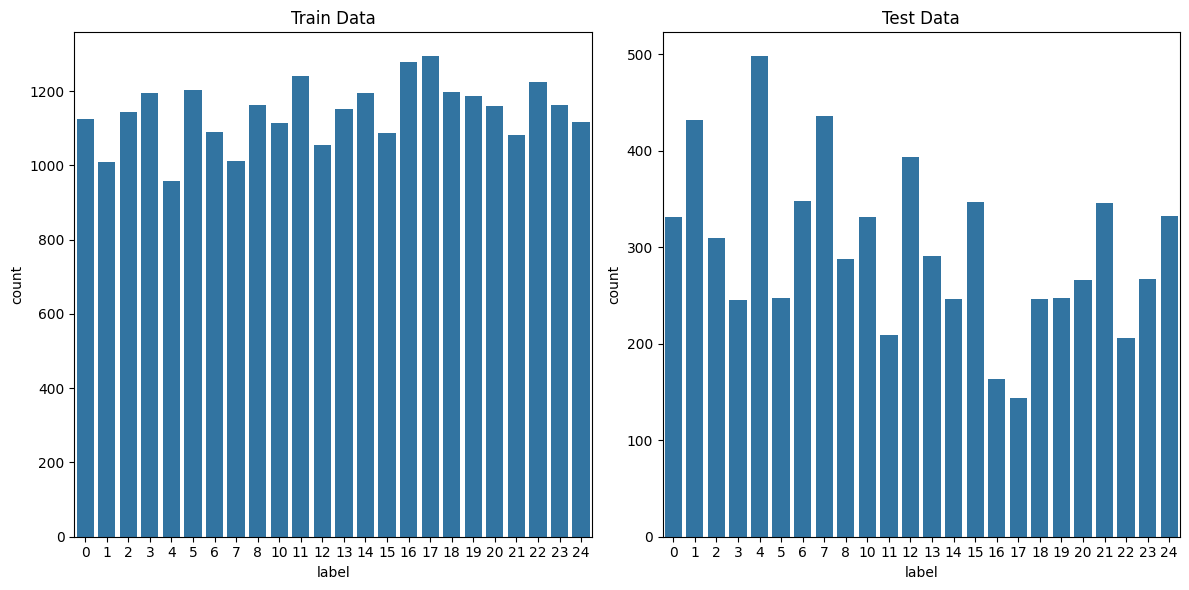

In [69]:
#Visualizing Class Distribution
# Set up the figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for training data
sns.countplot(data=reference_train_data, x="label", ax=axs[0])
axs[0].set_title('Train Data')

# Plot for test data
sns.countplot(data=reference_test_data, x="label", ax=axs[1])
axs[1].set_title('Test Data')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Loading and Preprocessing Sign Language Dataset**

This function and subsequent code segment load and preprocess the sign language dataset from CSV files for training and testing purposes.


In [103]:
# Function to load data from CSV
def load_data_from_csv(csv_file):
    data = pd.read_csv(csv_file)
    labels = data.iloc[:, 0]  # Extracting the Lables from the data set --> First column of data set
    images = data.iloc[:, 1:].values  # Extracting the Pixels from the data set --> Rest of the columns
    images = images.reshape(-1, 28, 28, 1) # Reshape to 28x28 and add channel dimension and normalization
    return images, labels

In [104]:
# # Function to load data from CSV
# def load_data_from_csv(csv_file):
#     data = pd.read_csv(csv_file)
#     labels = data.iloc[:, 0]  # Extracting the Lables from the data set --> First column of data set
#     images = data.iloc[:, 1:].values  # Extracting the Pixels from the data set --> Rest of the columns
#     return images, labels

In [105]:
# Load training and testing data
train_images, train_labels = load_data_from_csv('/content/sign_mnist_train.csv')
test_images, test_labels = load_data_from_csv('/content/sign_mnist_test.csv')

In [106]:
# Normalize the images with maximum pixel value 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# train_images = train_images.reshape(-1, 28, 28, 1)  # Reshape to 28x28 and add channel dimension
# test_images = test_images.reshape(-1, 28, 28, 1)  # Reshape to 28x28 and add channel dimension

# Label Encoding
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

In [107]:
print("train_image_shape :" ,train_images.shape)
print("train_label_shape :" ,train_labels.shape)
print("test_image_shape :" ,test_images.shape)
print("test_label_shape :" ,test_labels.shape)

train_image_shape : (27455, 28, 28, 1)
train_label_shape : (27455, 24)
test_image_shape : (7172, 28, 28, 1)
test_label_shape : (7172, 24)


**Verifying Training Dataset Images and Labels**

This code segment allows you to verify individual images and their corresponding labels from the training dataset interactively

6


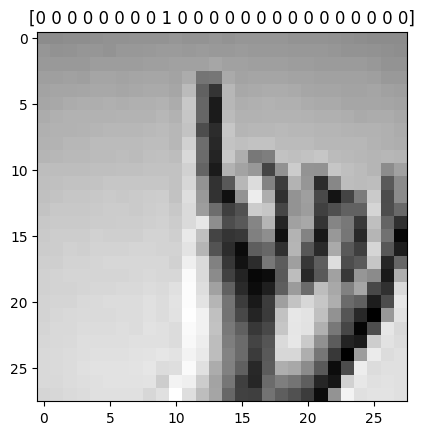

In [108]:
# Verification of train data set image and lable
image_index =int(input()) # Index input
plt.imshow(train_images[image_index],cmap='gray') # Image
plt.title(str(train_labels[image_index]))  # Label
plt.show()

**Data Augmentation Configuration**

This code snippet configures an "ImageDataGenerator" object for data augmentation, which is crucial for increasing the diversity of training examples without collecting additional data.

In [109]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

**Convolutional Neural Network Model Architecture**

This code segment defines a Convolutional Neural Network (CNN) model using TensorFlow's Keras API.

**Model Architecture:**
*   Convolutional Layers
*   Normalization and Pooling
*   Stacking Convolutional Layers
*   Flattening and Dense Layers
*   Batch Normalization and Dropout
*   Output Layer

This CNN architecture is designed for the sign language detection task, incorporating convolutional layers for feature extraction, pooling layers for spatial downsampling, dropout layers for regularization, and fully connected layers for classification. The model aims to learn and classify hand signs represented in the dataset effectively.




In [110]:
# Model Building
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(24, activation='softmax')
])

In [111]:
print(train_images.shape, train_images.dtype)
print(train_labels.shape, train_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(27455, 28, 28, 1) float64
(27455, 24) int64
(7172, 28, 28, 1) float64
(7172, 24) int64


**Compiling the Convolutional Neural Network Model**

This code segment compiles the previously defined Convolutional Neural Network (CNN) model using TensorFlow's Keras API.

Compiling the model configures it for training by specifying the optimizer, loss function, and evaluation metrics. This setup prepares the CNN model to learn from the training data and optimize its performance based on the specified objectives in the sign language detection project.

In [112]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 9, 9, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,088 (906.59 KB)

 Trainable params: 231,128 (902.84 KB)

 Non-trainable params: 960 (3.75 KB)

**Custom Callback for F1 Score Calculation**

The **"F1ScoreCallback"** class is a custom TensorFlow Keras callback designed to compute and print the weighted F1 score at the end of each epoch during model training. This helps assess the model's performance based on precision and recall metrics, providing valuable insights into its effectiveness for the sign language detection task.

In [114]:
# Custom callback to calculate F1 score for each epoch
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        predictions = model.predict(test_images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(test_labels, axis=1)
        f1 = f1_score(true_labels, predicted_labels, average='weighted')
        print(f"Epoch {epoch+1} - F1 Score: {f1:.2f}")

**Training the Convolutional Neural Network Model**

This code trains the CNN model using augmented data batches generated by **"datagen.flow()"**, validates the model's performance using the original test dataset, and prints the F1 score after each epoch using a custom callback. It aims to optimize the model's ability to classify sign language images accurately over multiple training iterations.

In [115]:
# Model Training
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    validation_data=(test_images, test_labels),
                    epochs=10,
                    callbacks=[F1ScoreCallback()])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
Epoch 1 - F1 Score: 0.54
429/429 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.3025 - loss: 5.3327 - val_accuracy: 0.5427 - val_loss: 2.4230
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Epoch 2 - F1 Score: 0.94
429/429 ━━━━━━━━━━━━━━━━━━━━ 70s 164ms/step - accuracy: 0.7722 - loss: 1.4333 - val_accuracy: 0.9441 - val_loss: 0.5724
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Epoch 3 - F1 Score: 0.98
429/429 ━━━━━━━━━━━━━━━━━━━━ 75s 149ms/step - accuracy: 0.8721 - loss: 0.7106 - val_accuracy: 0.9760 - val_loss: 0.3429
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
Epoch 4 - F1 Score: 0.98
429/429 ━━━━━━━━━━━━━━━━━━━━ 84s 153ms/step - accuracy: 0.9067 - loss: 0.5225 - val_accuracy: 0.9756 - val_loss: 0.3110
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
Epoch 5 - F1 Score: 0.99
429/429 ━━━━━━━━━━━━━━━━━━━━ 69s 159ms/step - accuracy: 0.9276 - loss: 0.4469 - val_accuracy: 0.9925 - val_loss: 0.2603
Epoch 6/10
225/225 ━━

**Evaluating the Trained Convolutional Neural Network Model**

This code snippet assesses the CNN model's ability to generalize to unseen data by evaluating its performance on the independent test dataset. It provides a quantitative measure of the model's accuracy in classifying sign language images, indicating how well the model has learned and generalized from the training data.

In [116]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9901 - loss: 0.2595
Test accuracy: 0.9909369945526123


**Classification Report and Confusion Matrix for Model Evaluation**
*   The classification report provides detailed metrics for evaluating the model's
performance on each class in the dataset.
*   The confusion matrix visually represents the model's predictions compared to the true labels, highlighting any patterns or discrepancies in classification accuracy across different classes.




In [117]:
# Classification Report and Confusion Matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


In [118]:
# Convert label binarizer classes to list of strings
target_names = [str(class_label) for class_label in label_binarizer.classes_]

In [119]:
print(classification_report(true_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.99      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      0.91      0.95       245
           4       1.00      0.97      0.99       498
           5       1.00      1.00      1.00       247
           6       0.99      1.00      0.99       348
           7       1.00      0.99      0.99       436
           8       1.00      1.00      1.00       288
          10       1.00      0.99      0.99       331
          11       1.00      1.00      1.00       209
          12       0.96      1.00      0.98       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.83      0.97      0.89       144
          18       0.97    

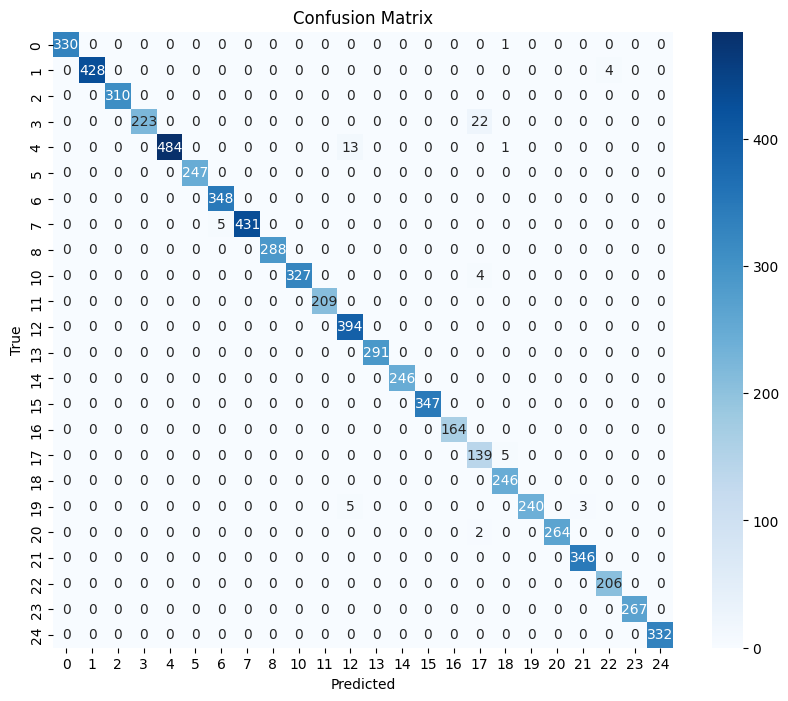

In [120]:
#Confusion_Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Model Saving**

Saving the model allows you to reuse it later for inference, deployment in applications, or further training. The HDF5 format preserves the model's architecture and weights, making it easy to load and use in different environments that support Keras or TensorFlow.

In [121]:
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    # Plotting model accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting model loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

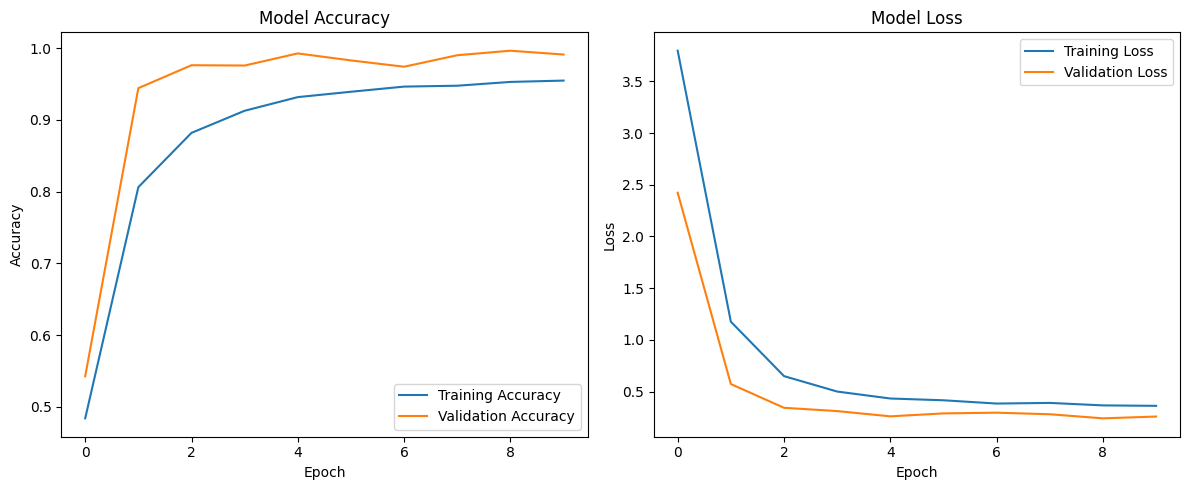

In [122]:
plot_metrics(history)

In [123]:
# Save the model
model.save('Sign_Language_Model_Batch_64_Epoch_10_V03.h5')